# Tutorial 2: Visualization of openface results

#### By B.L. de Vries - xx xx 2018 - v0.0.0.devXXX

As with the Tutorial 1 we will use several packages (see Tutorial 1 for an explanation and links). We will also import exploface and define a string containing an Openface outputfile (named ```openface_file```)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp

import exploface

openface_file = "video.csv"

## Content of the tutorial

1. Making a simle plot of several action units

## 1. Simple plot of several action units

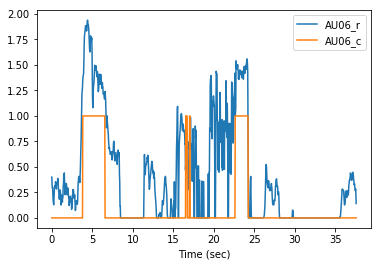

In [15]:
exploface.visualization.plot_action_units(openface_file, au_names=["AU06_r", "AU06_c"], show=True)

## 2. Saving a plot

If you want to save the plot, use:

```exploface.visualization.plot_action_units(openface_file, au_names=["AU06_r", "AU06_c"], show=True, filename=<path and filename without extension>)```

## 2. Different parameters used for calculating statistics, doing conversions and writing the Elan files.

#### 

In [6]:
datafile_timestamps = ef.get_time_stamp(input_file, uncertainty_threshold=0.8)
datafile_timestamps.head(15)

,au,end,start
0,AU01,8.32,6.88
1,AU01,27.55,26.41
2,AU02,5.30,5.17
3,AU02,7.48,7.05
4,AU02,8.15,7.78
5,AU02,26.31,25.44
6,AU02,27.28,26.81
7,AU02,31.31,28.25
8,AU02,31.98,31.61
9,AU02,33.09,32.21


### We plot the face and landmark confidence and AU06 for the video

au       AU06
end      6.54
start    3.83
Name: 21, dtype: object


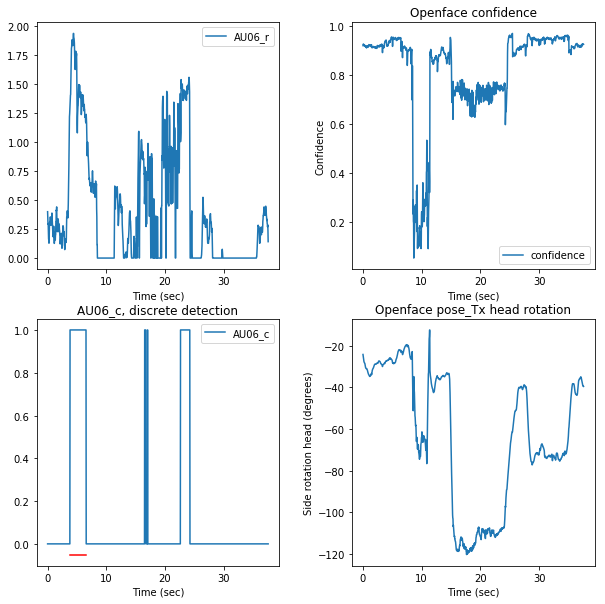

In [7]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(datafile['timestamp'], datafile["AU06_r"], label="AU06_r")
y=0.99
#for t in times_confident:
#    plt.plot((t[0],t[1]), (y,y), color="red")
plt.xlabel("Time (sec)")
plt.ylabel("")
plt.legend()

plt.subplot(2,2,3)
plt.title("AU06_c, discrete detection")
plt.plot(datafile['timestamp'], datafile["AU06_c"], label="AU06_c")
y=-0.05
for index, row in datafile_timestamps[datafile_timestamps["au"]=="AU06"].iterrows():
    print(row)
    plt.plot([row["start"], row["end"]], [y,y], "red")
#for t in times_confident:
#    plt.plot((t[0],t[1]), (y,y), color="red")
plt.xlabel("Time (sec)")
plt.ylabel("")
plt.legend()

plt.subplot(2,2,2)
plt.title("Openface confidence")
plt.plot(datafile['timestamp'], datafile["confidence"], label="confidence")
y=0.99
#for t in times_confident:
#    plt.plot((t[0],t[1]), (y,y), color="red")
plt.xlabel("Time (sec)")
plt.ylabel("Confidence")
plt.legend()

plt.subplot(2,2,4)
plt.title("Openface pose_Tx head rotation")
plt.plot(datafile['timestamp'], datafile['pose_Tx'])
plt.xlabel("Time (sec)")
plt.ylabel("Side rotation head (degrees)")

fig.subplots_adjust(wspace=0.3)#, hspace=0)
plt.show()

In the AU06_c plot, in red, you see the detection of the action unit. The other two spikes are not detected, because the confidence drops below 80% (we set uncertainty_threshold=0.8)

You can also see that the drops in confidence is due to the rotation of the head

## Write an elan file

In [8]:
df_timestamps = ef.write_elan_file(input_file, 
                output_path="elan_video3.eaf",
                video_path="video3.mp4", 
                uncertainty_threshold=0.8)

Check the elan file elan_video3.eaf